## Extract Explicit Observational Sentences using Customized Named Entity Recognition (NER)




## - Astronomia nova , Kepler

In [1]:
import pandas as pd
import numpy as np
%load_ext autoreload
%autoreload 2
from warnings import filterwarnings
filterwarnings('ignore')
import matplotlib.pyplot as plt 
import ipywidgets as widget
from ipywidgets import interact, widgets



In [2]:
options = {"compact": True, "bg": "#09a3d5",
           "color": "white", "font": "Source Sans Pro","collapse_phrases":False}

In [3]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('max_colwidth', 1000)


# 1-Loading the Kepler corpus

### Import resources; 

Here we load the enriched Kepler corpus. The corpus has been structured using a customized Named Entity Recognition model (NER). This model provided by a hybrid approach using the rule based patterns and deep learning. 

In [4]:
dfp=pd.read_pickle('../data/dfV09A02.pkl');
#df=pd.read_json('../data/dfV08A02.json');
df=dfp.sort_index();
df=dfp.reset_index(drop=True)

In [5]:
len(df)

6699

In [6]:
df.head()

,Chapter,ParaIndex,SentIndex,Paragraph,Sentence,Entities
0,1,0,0,Chapter 1,Chapter 1,[]
1,1,1,1,"On the distinction between the first motion and the second or proper motions; and in the proper motions, between the first and the second inequality.","On the distinction between the first motion and the second or proper motions; and in the proper motions, between the first and the second inequality.",[]
2,1,2,2,"The testimony of the ages confirms that the motions of the planets are orbicular. Reason, having borrowed from experience, immediately presumes this: that their gyrations are perfect circles. For among figures it is circles, and among bodies the heavens, that are considered the most perfect. However, when experience seems to teach something different to those who pay careful attention, namely, that the planets deviate from a simple circular path, it gives rise to a powerful sense of wonder, which at length drives people to look into causes.",The testimony of the ages confirms that the motions of the planets are orbicular.,[]
3,1,2,3,"The testimony of the ages confirms that the motions of the planets are orbicular. Reason, having borrowed from experience, immediately presumes this: that their gyrations are perfect circles. For among figures it is circles, and among bodies the heavens, that are considered the most perfect. However, when experience seems to teach something different to those who pay careful attention, namely, that the planets deviate from a simple circular path, it gives rise to a powerful sense of wonder, which at length drives people to look into causes.","Reason, having borrowed from experience, immediately presumes this: that their gyrations are perfect circles.",[]
4,1,2,4,"The testimony of the ages confirms that the motions of the planets are orbicular. Reason, having borrowed from experience, immediately presumes this: that their gyrations are perfect circles. For among figures it is circles, and among bodies the heavens, that are considered the most perfect. However, when experience seems to teach something different to those who pay careful attention, namely, that the planets deviate from a simple circular path, it gives rise to a powerful sense of wonder, which at length drives people to look into causes.","For among figures it is circles, and among bodies the heavens, that are considered the most perfect.",[]


### Explore Corpus

In [7]:
@interact
def ShowbyChapter( column='SentIndex', x=(1,len(dfp.SentIndex)-1)):
    return dfp.loc[dfp[column]==x ]

interactive(children=(Text(value='SentIndex', description='column'), IntSlider(value=3349, description='x', ma…

# 2-Filter out observation sentences

### 2a-Observational expressions included number ID of corpus; Paraindex and SentIndex

In [8]:
def observationFilterV02(x):
    list_en=[]
    for idx in range(0,len(x)):
        list_en.append(x[idx][1])
    result= all(lst in list_en for lst in ["COOR","DATE","TIME"])
    if result:
        y="Obs"
    else:
        y="NObs"
    return y
              

In [9]:

df['Label'] = df['Entities'].apply(lambda x: observationFilterV02(x))

In [10]:
dfObs=df[df.Label=="Obs"]
dfObs=dfObs.reset_index(drop=True)



In [11]:
dfObs.tail()

,Chapter,ParaIndex,SentIndex,Paragraph,Sentence,Entities,Label
70,65,1460,6116,"And I was now about to choose the mean between 17° Leo and 25° Leo, namely, 21° Leo, but the year 1585 gave me pause, since in that year the latitude observed at 21° 36' Leo was clearly not a maximum. For while the opposition was on the night following January 30, the latitude observed on the 24th, preceding the opposition, was 4° 31', still increasing, while on January 31, 16 hours past opposition, the observed latitude was again 4° 31'. It is therefore evident that on the 24th, if the opposition had occurred at that eccentric position, a latitude greater than 4° 31' would have been observed, for two reasons: first, because the celestial body was nearer the earth than when it was not at its acronychal position, and second, because Mars was farther from apogee, and was lower.","For while the opposition was on the night following January 30, the latitude observed on the 24th, preceding the opposition, was 4° 31', still increasing, while on January 31, 16 hours past opposition, the observed latitude was again 4° 31'.","[(opposition, ASTR), (January 30, DATE), (latitude, ASTR), (observed, ASTR), (opposition, ASTR), (4° 31', COOR), (January 31, DATE), (16 hours, TIME), (opposition, ASTR), (observed, ASTR), (latitude, ASTR), (4° 31', COOR)]",Obs
71,69,1554,6538,"Let us therefore follow whither our inclinations and our arguments lead: as in the first case, in the second year of Antonine, on the 12th day of Epiphi, at the 8th hour, at Alexandria in Egypt, let Mars's mean motion from the equinoctial be 11° 18' 30"" Sagittarius. This time corresponds to the common year of Christ 139 May 27. The difference of meridians between Hven and Alexandria is nearly two hours, from the most recent geographical tables. Therefore, at Hven in the year of Christ 139 May 27 at 6h the mean motion was 8s 11° 18' 30"". But in that year, Cor Leonis had a longitude of 2° 30' Leo, that is, 4s 2° 30' 0"". Therefore Mars's mean motion was 4s 8° 48' 30"" from Cor Leonis. But on 159944 May 27 at 6h Mars's mean motion was 0s 0° 47' 30"" from the equinoctial, while the distance of Cor Leonis from that point, as demonstrated by Brahe, was 4s 24° 15' 45"". Therefore Mars was 7s 6° 31' 45"" from Cor Leonis.","Therefore, at Hven in the year of Christ 139 May 27 at 6h the mean motion was 8s 11° 18' 30"".","[(Hven, NAME), (May 27, DATE), (6h, TIME), (11° 18' 30"", COOR)]",Obs
72,69,1554,6541,"Let us therefore follow whither our inclinations and our arguments lead: as in the first case, in the second year of Antonine, on the 12th day of Epiphi, at the 8th hour, at Alexandria in Egypt, let Mars's mean motion from the equinoctial be 11° 18' 30"" Sagittarius. This time corresponds to the common year of Christ 139 May 27. The difference of meridians between Hven and Alexandria is nearly two hours, from the most recent geographical tables. Therefore, at Hven in the year of Christ 139 May 27 at 6h the mean motion was 8s 11° 18' 30"". But in that year, Cor Leonis had a longitude of 2° 30' Leo, that is, 4s 2° 30' 0"". Therefore Mars's mean motion was 4s 8° 48' 30"" from Cor Leonis. But on 159944 May 27 at 6h Mars's mean motion was 0s 0° 47' 30"" from the equinoctial, while the distance of Cor Leonis from that point, as demonstrated by Brahe, was 4s 24° 15' 45"". Therefore Mars was 7s 6° 31' 45"" from Cor Leonis.","But on 159944 May 27 at 6h Mars's mean motion was 0s 0° 47' 30"" from the equinoctial, while the distance of Cor Leonis from that point, as demonstrated by Brahe, was 4s 24° 15' 45"".","[(159944 May 27, DATE), (6h, TIME), (Mars, PLAN), (0° 47' 30"", COOR), (Cor Leonis, STAR), (24° 15' 45"", COOR)]",Obs
73,69,1562,6554,"In the year of Christ 139 Pharmouthi 9, which is February 23, at sunset at 5h 30m, 3h 30m at Hven, the apparent position of the sun was computed as 3° 3' Pisces; therefore, the mean position was 0° 43' Pisces. But the longitude of Cor Leonis was found to be 2° 30' Leo. There

### Distribution of Explicit observational Sentences over chapters

In [12]:
a=[]
for i in set(dfObs["Chapter"]):
    Obch=dfObs[dfObs.Chapter == i].shape[0]
    a.append((i,Obch))
x_labels=[x[0] for x in a]
new_x_labels= [2*i for i in x_labels]
y_lables=[x[1] for x in a]

Text(0.5, 1.0, 'Distribution of explicit observation over different chapters')

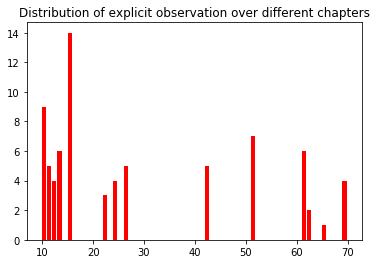

In [13]:
plt.bar(x_labels,y_lables,color="r",align='edge', width=.8)
plt.title("Distribution of explicit observation over different chapters")

## 2a-Observational Sentences in Paragraph Included Number ID of corpus Paraindex and SentIndex

In [14]:
@interact
def ShowbyChapter(x=(0,len(dfObs)-1)):
    return dfObs.loc[dfObs.index<=x]

interactive(children=(IntSlider(value=37, description='x', max=74), Output()), _dom_classes=('widget-interact'…

### 2b-Observational Sentences in Paragraph Included Interactive Dependency Parsing 

In [15]:
import spacy 
from spacy import displacy 
path= '../data/Model_U34'
nlp=spacy.load(path)

In [16]:
#remove north south

In [17]:
options={"ents": ["TIME", "DATE","PARA","COOR" ,"STAR","PLAN","NAME", "GEOM"],"colors":{"TIME":"CORAL","DATE":"TOMATO","PARA":"LIGHGRAY","COOR":"MAGENTA","STAR":"GREEN","PLAN":"LIME","NAME":"ROSYBROWN", "GEOM":"BLUE"}}

In [18]:
@interact
def ShowInteractiveDEP( x=(0,len(dfObs)-1)):
    Sent=dfObs.iloc[x,4];
    doc=nlp(Sent)
    displacy.render(doc, style="dep",jupyter=True,)
    return  dfObs.loc[dfObs.index==x ]

interactive(children=(IntSlider(value=37, description='x', max=74), Output()), _dom_classes=('widget-interact'…

## 2c-Observation Expression Included Interactvie NER

In [19]:
@interact
def ShowDetail( x=(0,len(dfObs)-1)):
    Sent=dfObs.iloc[x,4];
    doc=nlp(Sent)
    displacy.render(doc,style="ent",jupyter="True",options=options )
    return dfObs.loc[dfObs.index==x ] 


interactive(children=(IntSlider(value=37, description='x', max=74), Output()), _dom_classes=('widget-interact'…